# **What influences out sleep quality?**

This notebook examines the impact of demographic, health, and lifestyle factors through data analysis and visualization. Sleep quality was assessed subjectively with participants rating their average sleep quality on a scale from 1 to 10. 

## **Import Libraries** 

In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
import scipy.stats as stats

In [30]:
rcParams['font.family'] = 'Open Sans'

## **Data Loading and Preprocessing**

In [32]:
# Load the dataset
data = pd.read_csv('sleep-and-lifestyle.csv')

# Bin ages into groups of 10-year intervals
data['Age Group'] = pd.cut(
    data['Age'],
    bins = [20, 30, 40, 50, 60],
    labels = ['20-30', '31-40', '41-50', '51-60']
)

# Fill null values for 'Sleep Disorder' with 'No Sleep Disorder' to represent those without insomnia or sleep apnea
data['Sleep Disorder'] = data['Sleep Disorder'].fillna('No Sleep Disorder')

## **Dataset Overview**

In [34]:
data.info()
display(data.describe())
display(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Gender             374 non-null    object  
 1   Age                374 non-null    int64   
 2   Occupation         374 non-null    object  
 3   Sleep Duration     374 non-null    float64 
 4   Sleep Quality      374 non-null    int64   
 5   Physical Activity  374 non-null    int64   
 6   Stress Level       374 non-null    int64   
 7   BMI Category       374 non-null    object  
 8   Daily Steps        374 non-null    int64   
 9   Sleep Disorder     374 non-null    object  
 10  Age Group          374 non-null    category
dtypes: category(1), float64(1), int64(5), object(4)
memory usage: 29.9+ KB


,Age,Sleep Duration,Sleep Quality,Physical Activity,Stress Level,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,42.184492,7.132086,7.312834,59.171123,5.385027,6816.844920
std,8.673133,0.795657,1.196956,20.830804,1.774526,1617.915679
min,27.000000,5.800000,4.000000,30.000000,3.000000,3000.000000
25%,35.250000,6.400000,6.000000,45.000000,4.000000,5600.000000
50%,43.000000,7.200000,7.000000,60.000000,5.000000,7000.000000
75%,50.000000,7.800000,8.000000,75.000000,7.000000,8000.000000
max,59.000000,8.500000,9.000000,90.000000,8.000000,10000.000000


,Gender,Age,Occupation,Sleep Duration,Sleep Quality,Physical Activity,Stress Level,BMI Category,Daily Steps,Sleep Disorder,Age Group
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,4200,None,20-30
1,Male,28,Doctor,6.2,6,60,8,Normal,10000,None,20-30
2,Male,28,Doctor,6.2,6,60,8,Normal,10000,None,20-30
3,Male,28,Sales Representative,5.9,4,30,8,Obese,3000,Sleep Apnea,20-30
4,Male,28,Sales Representative,5.9,4,30,8,Obese,3000,Sleep Apnea,20-30


The dataset consists of 374 observations with no missing values for any of the variables, and all data types are in the correct format for analysis. An overview of the summary statistics reveals a predominately middle-aged sample (x̅ = ~42) with fairly good sleep durations (approximately 7 hours on average) and percieved sleep qualities (x̅ = ~7.3). Stress level ratings seem somewhat low (x̅ = ~5.4), however physical activity and daily steps are highly variable, indicating that some individuals are very active while others are somewhat sedentary.

## **Gender and Age Distribution**

### **Proportion of Genders**

In [38]:
gender_proportions = (data['Gender'].value_counts(normalize=True) * 100.).reset_index()
display(gender_proportions)

,index,Gender
0,Male,50.534759
1,Female,49.465241


The proportion of genders is nearly balanced with males constituting 50.53% of the dataset and females making up 49.47%. 

### **Age Group Distribution by Gender**

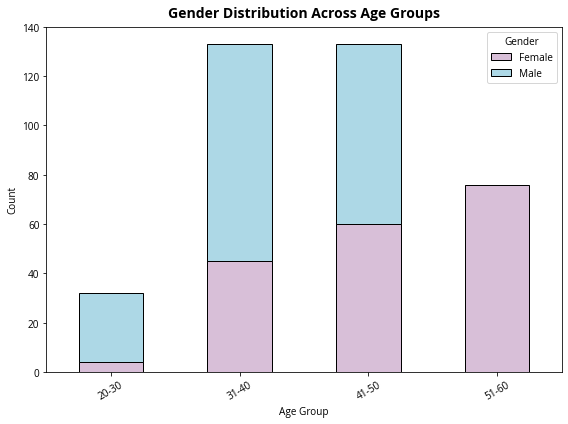

In [41]:
# Count the number of males and females in each age group
gender_counts_by_age_group = data.groupby(['Age Group', 'Gender'], observed=True).size().unstack()

# Stacked Bar Graph
plt.figure(figsize=(8, 6))

gender_counts_by_age_group.plot(
    kind='bar',
    stacked=True,
    color=['thistle', 'lightblue'],
    edgecolor='black',
    ax=plt.gca()
)

plt.title('Gender Distribution Across Age Groups', fontsize=14, fontweight='bold', y=1.01)
plt.xlabel('Age Group', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.xticks(rotation=30, fontsize=10)
plt.yticks(np.arange(0, 160, 20))
plt.tight_layout()
plt.show()

The bar graph shows that the majority of participants fall within the 31-40 and 41-50 age groups, with males outnumbering females, though females still constitute a fair portion of these groups. Conversely, the 20-30 age group had the fewest participants, predominantly males, while the 51-60 age group consisted exclusively of females. 

## **Gender vs. Sleep Quality**

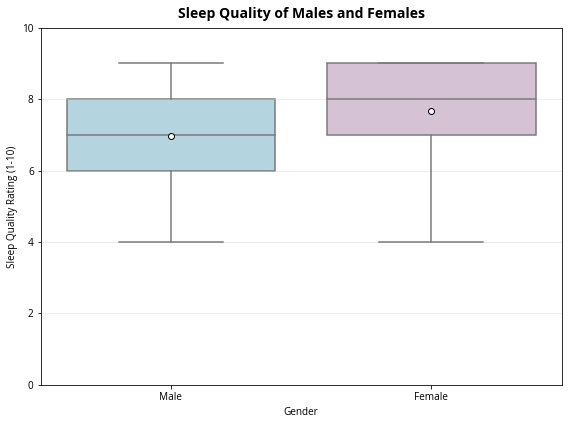

t-statistic = -5.86, p-value = 1.08e-08


In [44]:
# Boxplot
plt.figure(figsize=(8, 6))

sns.boxplot(
    x='Gender',
    y='Sleep Quality',
    data=data,
    showmeans=True,
    palette={'Male': 'lightblue', 'Female': 'thistle'}, 
    meanprops={'marker': 'o', 'markerfacecolor': 'white', 'markeredgecolor': 'black'} 
)

plt.ylim(0, 10) 
plt.title('Sleep Quality of Males and Females', fontsize=14, fontweight='bold', y=1.01)
plt.ylabel('Sleep Quality Rating (1-10)', fontsize=10)
plt.xlabel('Gender', fontsize=10)
plt.grid(axis='y', linestyle='-', color='lightgray', alpha=0.5)
plt.tight_layout()
plt.show()


# Perform Welch's t-test
t_stat, p_value = stats.ttest_ind(data[data['Gender'] == 'Male']['Sleep Quality'], 
                                  data[data['Gender'] == 'Female']['Sleep Quality'],
                                  equal_var=False)
print(f't-statistic = {t_stat.round(2)}, p-value = {p_value:.2e}')

On average, females rate their sleep slightly higher than males, consistently scoring one point higher at the 25th, 50th, and 75th percentiles. A Welch's t-test confirms this mean difference is significant, suggesting that this is unlikely due to chance. Overall, these findings suggest that females in this sample experience better sleep quality than males which is consistent with trends found in prior studies.

## **Age vs. Sleep Quality**

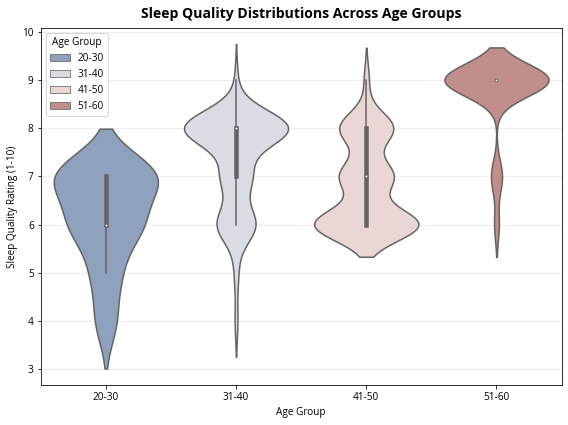

rho = 0.42, p-value = 3.11e-17


In [47]:
# Violinplot
plt.figure(figsize=(8, 6))

sns.violinplot(
    x='Age Group',
    y='Sleep Quality',
    data=data,
    hue='Age Group',
    palette='vlag',
    dodge=False
)
plt.title('Sleep Quality Distributions Across Age Groups', fontsize=14, fontweight='bold', y=1.01)
plt.xlabel('Age Group', fontsize=10)
plt.ylabel('Sleep Quality Rating (1-10)', fontsize=10)
plt.gca().set_axisbelow(True)
plt.grid(axis='y', linestyle='-', color='lightgray', alpha=0.5)
plt.tight_layout()
plt.show()

# Calculate Spearman rank correlation and corresponding p-value
rho, p_value = stats.spearmanr(data['Age'], data['Sleep Quality'])
print(f'rho = {rho.round(2)}, p-value = {p_value:.2e}')

The 20-30 age group appears to have the lowest average sleep quality ratings, mostly falling between 6 and 7. The 31-40 age group most frequently reports around an 8, though some cluster around 6. In contrast, the 41-50 age group centers around 6 but includes some high ratings of 8. Finally, the 51-60 age group shows a tight cluster around 9, indicating the highest overall sleep quality. 

The Spearman's rank coefficient of 0.42 indicates a moderately positive relationship between age and sleep quality. This suggests that sleep quality tends to improve with age in this dataset. The very small p-value (3.11e-17) indicates that this finding is statistically significant. However, these findings differ with much of the existing research that often indicates the opposite trend. Therefore, further exploration into potential confounding factors is needed.

## **Occupation vs. Sleep Quality**

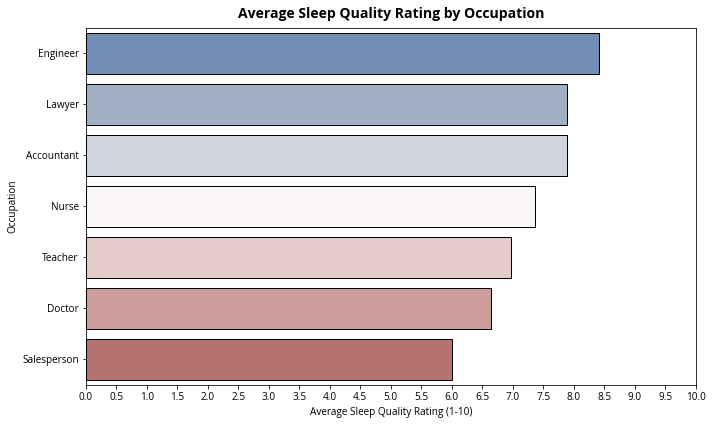

,Occupation,stdev
0,Accountant,0.458487
1,Doctor,0.757790
2,Engineer,0.754234
3,Lawyer,0.311661
4,Nurse,1.550151
5,Salesperson,0.000000
6,Teacher,0.659740


In [50]:
# Identify the top 7 most common occupations
occupation_counts = data['Occupation'].value_counts().head(7).reset_index(name='Count')
occupation_counts.rename(columns={'index': 'Occupation'}, inplace=True)
top_occupations = data[data['Occupation'].isin(occupation_counts['Occupation'])]

# Calculation the average sleep quality in each occupation
occupation_sleep = (top_occupations.groupby('Occupation')['Sleep Quality'].agg(['mean']).reset_index().sort_values('mean', ascending=False))

# Bar Graph
plt.figure(figsize=(10, 6))

sns.barplot(
    x='mean',
    y='Occupation',
    data=occupation_sleep,
    edgecolor='black',
    palette='vlag'
)
plt.title('Average Sleep Quality Rating by Occupation', fontsize=14, fontweight='bold', y=1.01)
plt.xlabel('Average Sleep Quality Rating (1-10)', fontsize=10)
plt.ylabel('Occupation', fontsize=10)
plt.xticks(np.arange(0, 10.5, 0.5))
plt.tight_layout()
plt.show()

# Calculate the standard deviation of sleep quality within each occupation
display(top_occupations.groupby('Occupation')['Sleep Quality'].agg('std').reset_index(name='stdev'))

Among the seven most common occupations in the dataset, engineers reported the highest average sleep quality rating. Salespeople had the lowest average sleep quality rating, followed by doctors. Sleep quality ratings among the salespeople were uniform (SD = 0.00), whereas nurses had the highest variability (SD = 1.55) compared to the other occupations. Overall, occupations with higher sleep quality ratings may reflect the benefits of consistent work schedules. Conversely, lower sleep quality ratings could be associated with irregular work hours. The variability in ratings among certain occupations, such as nurses, likely highlight the diverse nature of their field. However, it is worth further investigating how factors such as stress levels and average physical activity influence their sleep quality.

## **Sleep Duration vs. Sleep Quality**

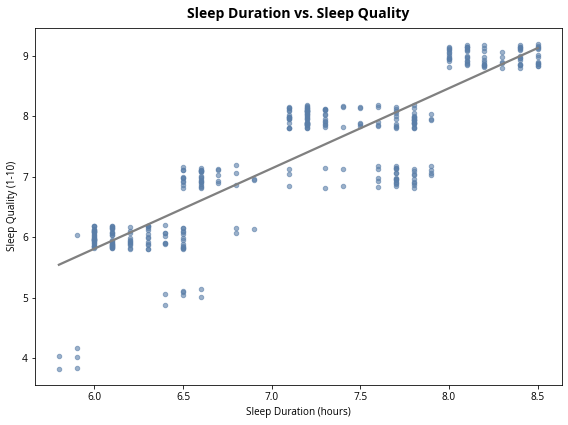

In [53]:
# Regression plot
plt.figure(figsize=(8,6))

sns.regplot(
    x='Sleep Duration',
    y='Sleep Quality',
    data=data,
    ci=None,
    y_jitter=0.2,
    scatter_kws={'alpha':0.6, 's':20, 'color': '#5a7ea8'},
    line_kws={'color': 'gray'}
)
plt.title('Sleep Duration vs. Sleep Quality', fontsize=14, fontweight='bold', y=1.01)
plt.xlabel('Sleep Duration (hours)')
plt.ylabel('Sleep Quality (1-10)')
plt.tight_layout()
plt.show()

This regression plot shows a positive relationship between the number of hours sleep and percieved sleep quality. Addressing factors that cause reduced sleep may be beneficial in aiding better sleep quality. 

## **Stress Levels vs. Sleep Quality**

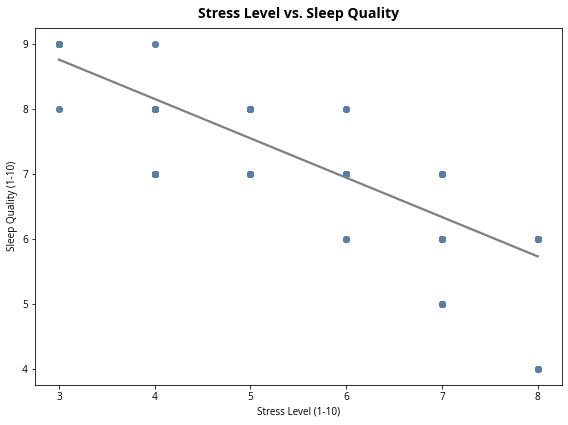

In [56]:
# Regression Plot
plt.figure(figsize=(8,6))

sns.regplot(
    x='Stress Level',
    y='Sleep Quality',
    data=data,
    ci=None,
    scatter_kws={'color':'#5a7ea8'},
    line_kws={'color': 'gray'}
)

plt.title('Stress Level vs. Sleep Quality', fontsize=14, fontweight='bold', y=1.01)
plt.xlabel('Stress Level (1-10)')
plt.ylabel('Sleep Quality (1-10)')
plt.tight_layout()
plt.show()

There is a clear downward trend in sleep quality ratings as stress levels increase. Implementing coping strategies and reducing stress-inducing factors may effectively enhance sleep quality.

## **Sleep Disorders, BMI, and Sleep Quality**

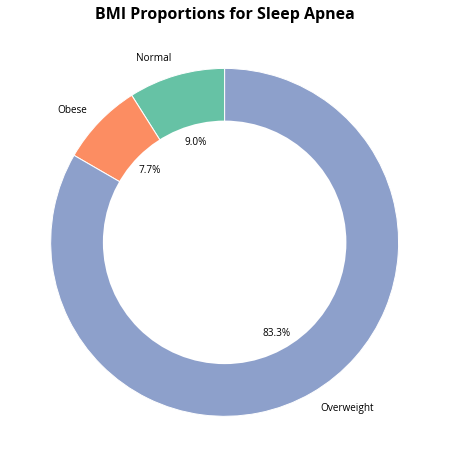

In [204]:
# Calculate the percentage distribution of BMI categories within each sleep disorder
disorder_by_bmi_proportions = (data.groupby('Sleep Disorder')['BMI Category'].value_counts(normalize=True) * 100).unstack(level=0).round(2)

# Example for a single sleep disorder
# proportions_single = disorder_by_bmi_proportions['Sleep Apnea']  # Replace with your column of interest
# colors = ['#66C2A5', '#FC8D62', '#8DA0CB']
# fig, ax = plt.subplots(figsize=(8, 8))
# ax.pie(
#     proportions_single,
#     labels=proportions_single.index,
#     autopct='%1.1f%%',
#     startangle=90,
#     colors=colors,
#     wedgeprops={'edgecolor': 'white'}
# )

# # Add a circle to make it a donut chart
# center_circle = plt.Circle((0, 0), 0.70, fc='white')
# fig.gca().add_artist(center_circle)

# # Title
# plt.title('BMI Proportions for Sleep Apnea', fontsize=16, weight='bold')
# plt.show()

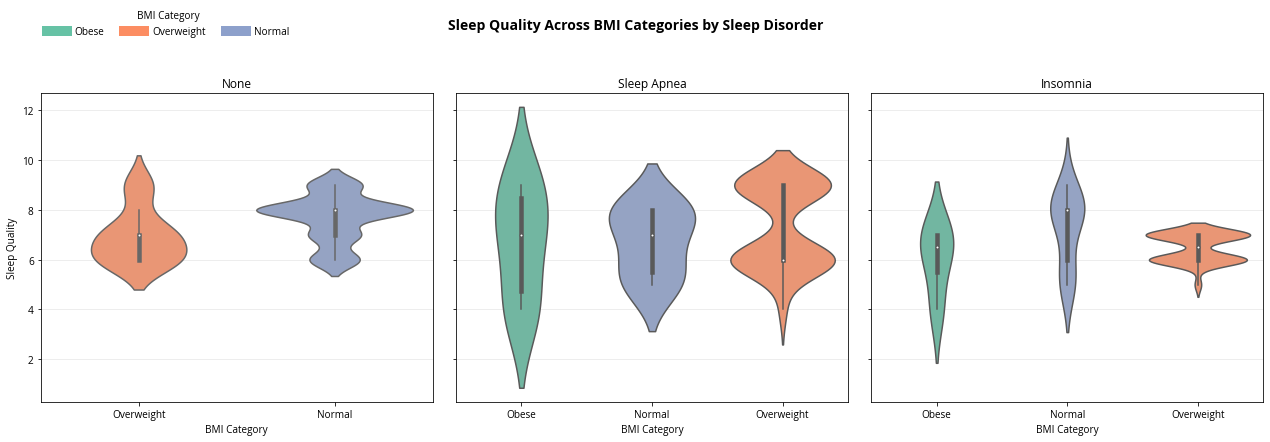

In [206]:
# Violin Subplots
palette = {'Obese':'#66C2A5', 'Overweight':'#FC8D62', 'Normal':'#8DA0CB'}

fig, ax = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Generate a violin plot for each sleep disorder
for i, condition in enumerate(data['Sleep Disorder'].unique()):
    sns.violinplot(
      x='BMI Category',
      y='Sleep Quality',
      palette=palette,
      data=data[data['Sleep Disorder'] == condition],
      ax=ax[i]
      )
    ax[i].set_title(condition)

    # Set y-axis label only for the first plot
    if i == 0:
        ax[i].set_ylabel('Sleep Quality')
    else:
        ax[i].set_ylabel('')
        
    # Suppress individual subplot labels
    ax[i].legend([], [], frameon=False)

    # Create grid lines and ensure they are are below the data
    ax[i].set_axisbelow(True)
    ax[i].grid(axis='y', linestyle='-', color='lightgray', alpha=0.5)

# Create a legend for the entire figure
handles = [plt.Line2D([0], [0], color=color, lw=10) for color in palette.values()]
labels = list(palette.keys())
fig.legend(handles, labels, title="BMI Category", bbox_to_anchor=(0.24, 1.05), ncol=3, fontsize=10,frameon=False)

fig.suptitle('Sleep Quality Across BMI Categories by Sleep Disorder', fontsize=14, fontweight='bold', y=1.01)

fig.tight_layout(pad=2)
plt.show()

## **Activity and Sleep Quality**